# Cleaned Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, roc_auc_score 

import warnings
warnings.filterwarnings("ignore")
sns.set() 
star_data = pd.read_csv('nasa.csv')

star_data_dropped_1 = star_data.drop(["Neo Reference ID","Name","Est Dia in KM(min)","Est Dia in KM(max)","Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(max)","Close Approach Date","Relative Velocity km per hr","Orbit ID","Orbit Determination Date","Miles per hour","Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(miles)","Epoch Date Close Approach"],axis=1)
star_data_dropped2 = star_data_dropped_1.drop(columns=['Orbiting Body', 'Equinox'])
star_data_dropped3 = star_data_dropped2.drop(columns=['Epoch Osculation'], axis=1)
star_data_dropped4 = star_data_dropped3.drop(columns=['Est Dia in M(min)', 'Orbital Period'], axis=1)


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr, color = 'green', label = 'ROC')
    plt.plot([0, 1], [0, 1], color = 'purple', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    

---
# Machine Learning

## a. XGBoost ML without removal of outliers, or correction

### XGBoost

In [2]:
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [3]:
X = star_data_dropped4[star_data_dropped4.columns.difference(['Hazardous'])]
X.head()

,Absolute Magnitude,Aphelion Dist,Asc Node Longitude,Eccentricity,Est Dia in M(max),Inclination,Jupiter Tisserand Invariant,Mean Anomaly,Mean Motion,Minimum Orbit Intersection,Miss Dist.(kilometers),Orbit Uncertainity,Perihelion Arg,Perihelion Distance,Perihelion Time,Relative Velocity km per sec,Semi Major Axis
0,21.6,2.005764,314.373913,0.425549,284.472297,6.025981,4.634,264.837533,0.590551,0.025282,62753692.0,5,57.257470,0.808259,2.458162e+06,6.115834,1.407011
1,21.3,1.497352,136.717242,0.351674,326.617897,28.412996,5.457,173.741112,0.845330,0.186935,57298148.0,3,313.091975,0.718200,2.457795e+06,18.113985,1.107776
2,20.3,1.966857,259.475979,0.348248,517.654482,4.237961,4.557,292.893654,0.559371,0.043058,7622911.5,0,248.415038,0.950791,2.458120e+06,7.590711,1.458824
3,27.4,1.527904,57.173266,0.216578,19.680675,7.905894,5.093,68.741007,0.700277,0.005512,42683616.0,6,18.707701,0.983902,2.457902e+06,11.173874,1.255903
4,21.6,1.483543,84.629307,0.210448,284.472297,16.793382,5.154,135.142133,0.726395,0.034798,61010824.0,1,158.263596,0.967687,2.457814e+06,9.840831,1.225615


In [4]:
y = star_data_dropped4['Hazardous'].astype(int)
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Hazardous, dtype: int32

[15:13:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


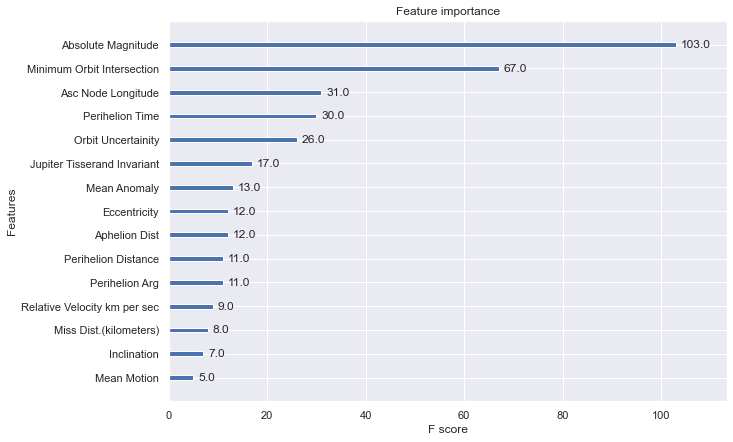

In [5]:
model = XGBClassifier()
model.fit(X, y)


ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 7)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = XGBClassifier(verbosity = 0, silent=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.68%


------------------------------------------------------------------------------------------------
Thresh=0.00000, n=17, Accuracy: 99.68%


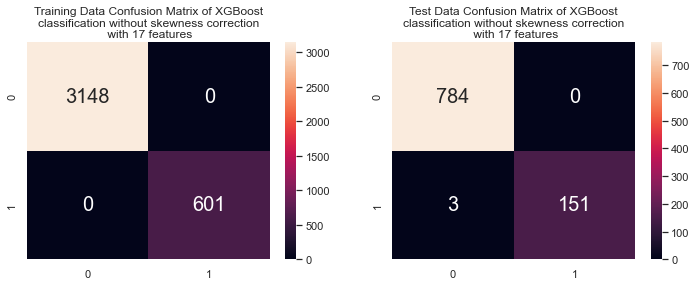

Train Accuracy: 100.00%
Test Accuracy: 99.68%


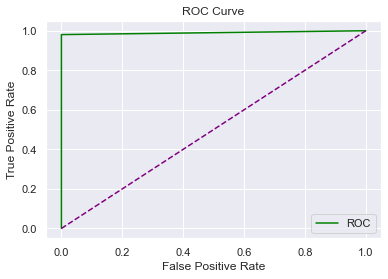

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00000, n=17, Accuracy: 99.68%


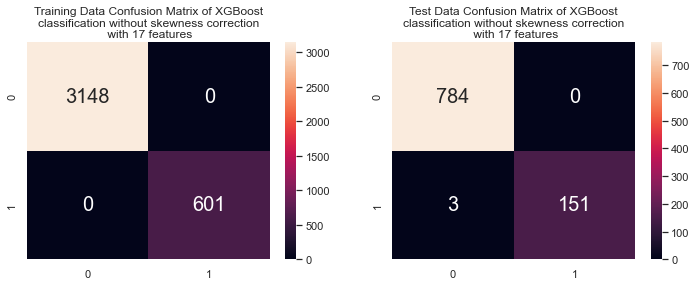

Train Accuracy: 100.00%
Test Accuracy: 99.68%


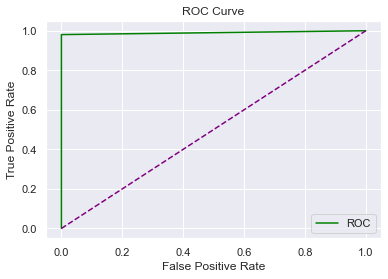

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00131, n=15, Accuracy: 99.68%


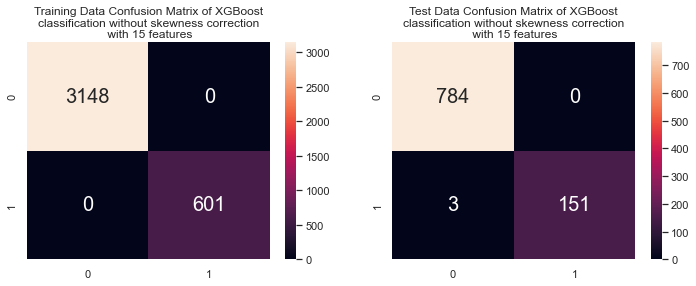

Train Accuracy: 100.00%
Test Accuracy: 99.68%


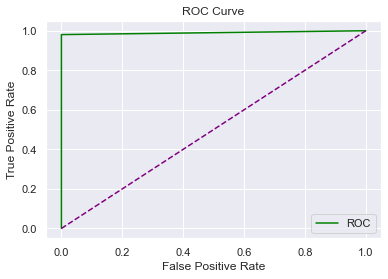

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00239, n=14, Accuracy: 99.68%


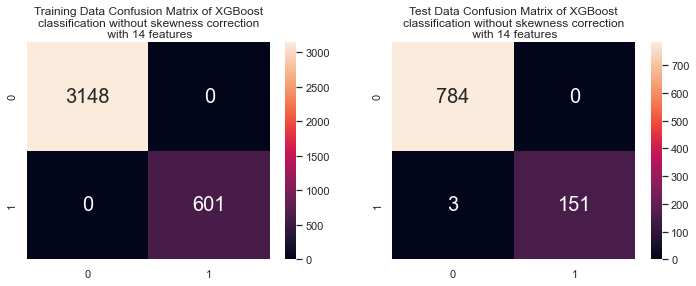

Train Accuracy: 100.00%
Test Accuracy: 99.68%


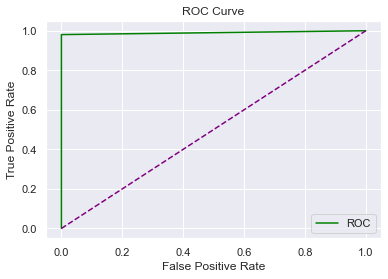

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00290, n=13, Accuracy: 99.68%


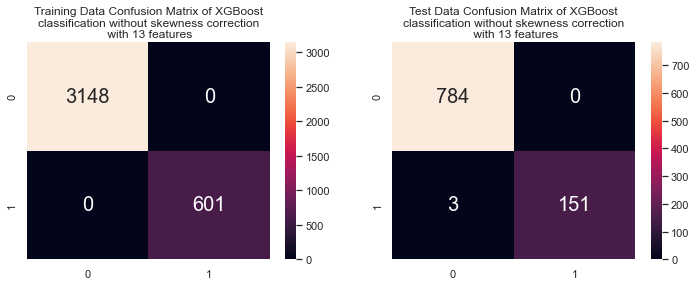

Train Accuracy: 100.00%
Test Accuracy: 99.68%


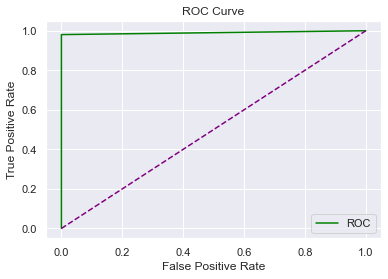

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00356, n=12, Accuracy: 99.68%


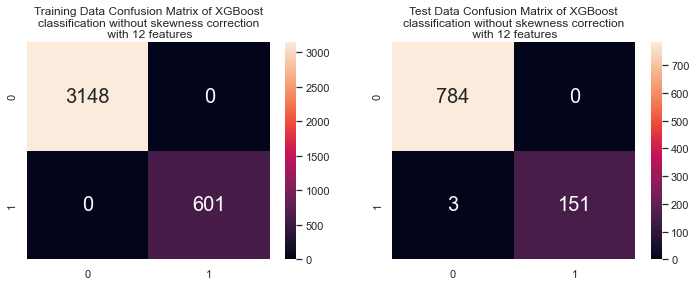

Train Accuracy: 100.00%
Test Accuracy: 99.68%


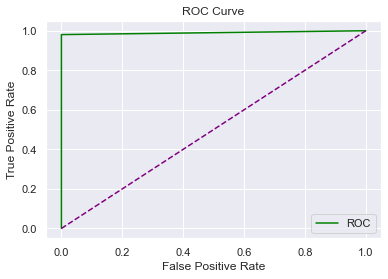

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00496, n=11, Accuracy: 99.68%


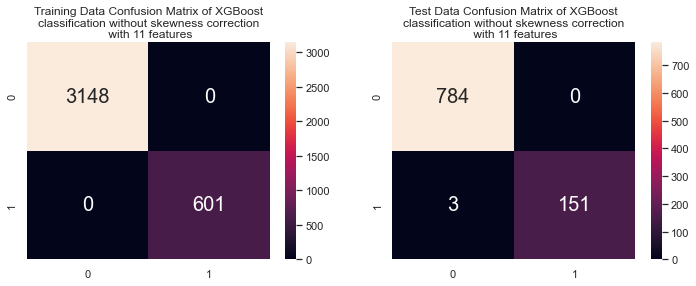

Train Accuracy: 100.00%
Test Accuracy: 99.68%


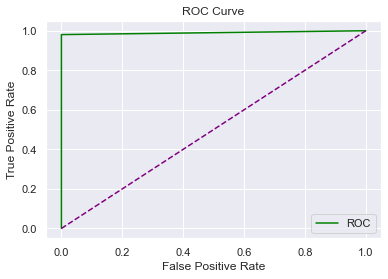

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00501, n=10, Accuracy: 99.68%


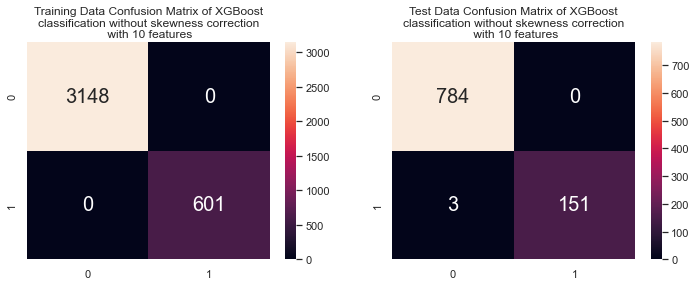

Train Accuracy: 100.00%
Test Accuracy: 99.68%


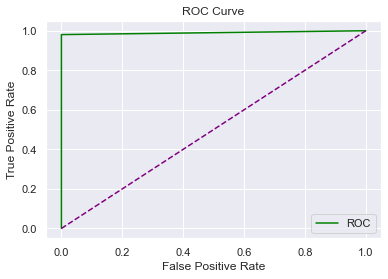

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00602, n=9, Accuracy: 99.68%


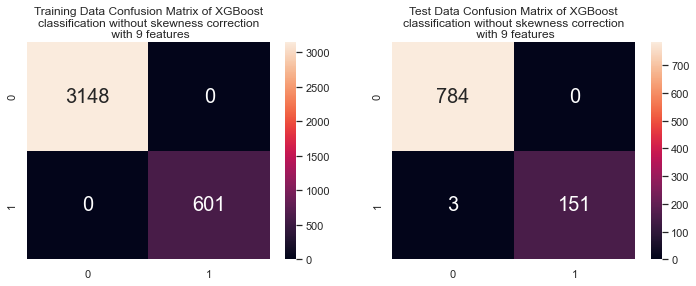

Train Accuracy: 100.00%
Test Accuracy: 99.68%


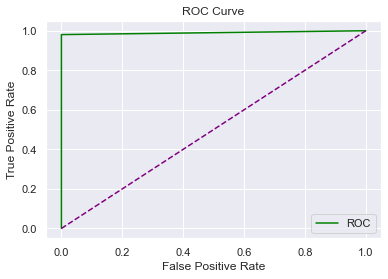

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00733, n=8, Accuracy: 99.68%


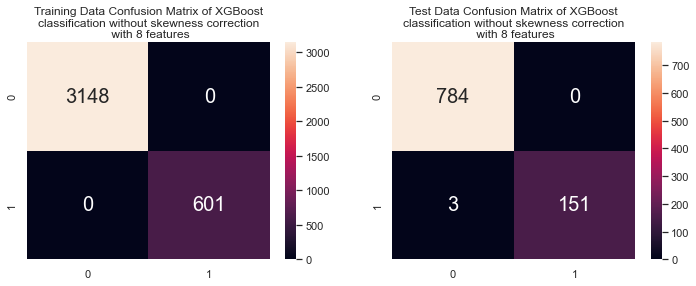

Train Accuracy: 100.00%
Test Accuracy: 99.68%


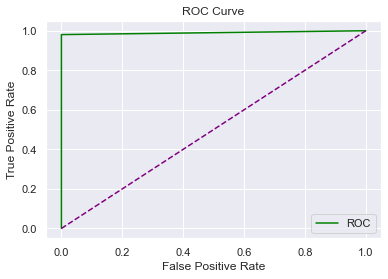

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00828, n=7, Accuracy: 99.68%


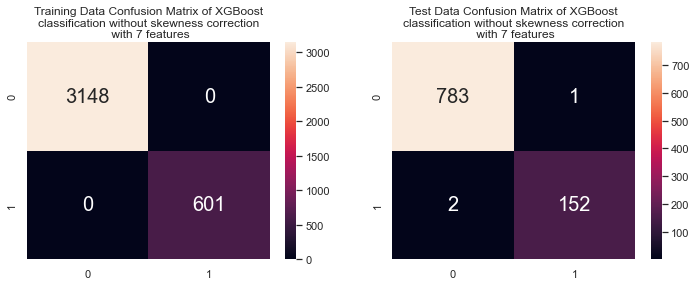

Train Accuracy: 100.00%
Test Accuracy: 99.68%


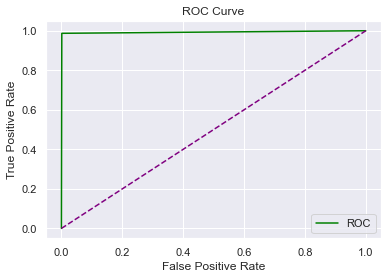

ROC-AUC Score: 0.993
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.00960, n=6, Accuracy: 99.68%


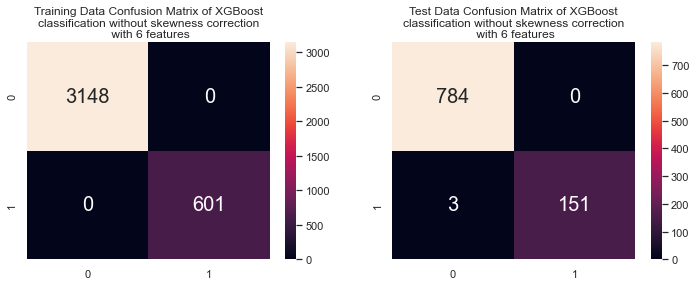

Train Accuracy: 100.00%
Test Accuracy: 99.68%


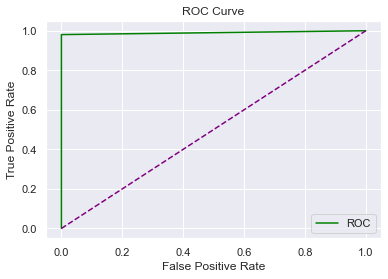

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.01302, n=5, Accuracy: 99.68%


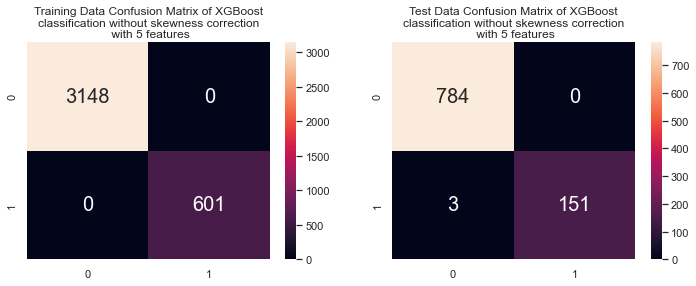

Train Accuracy: 100.00%
Test Accuracy: 99.68%


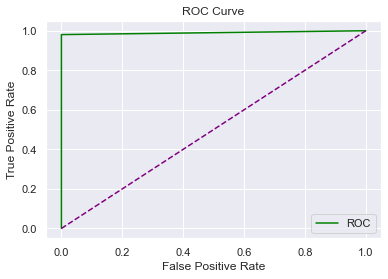

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.01696, n=4, Accuracy: 99.68%


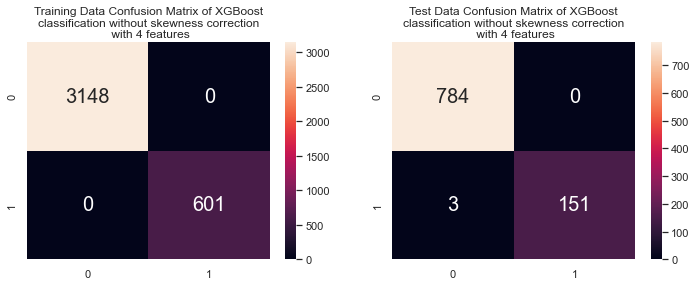

Train Accuracy: 100.00%
Test Accuracy: 99.68%


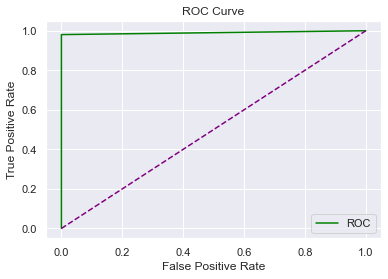

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.01924, n=3, Accuracy: 99.68%


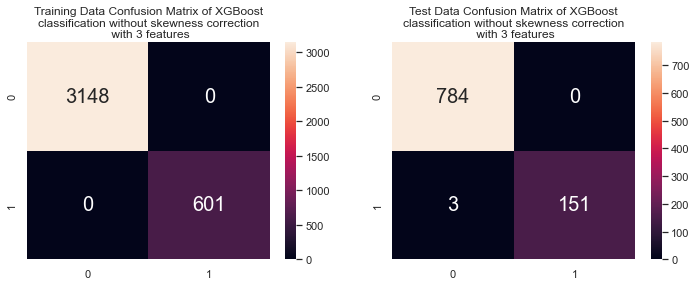

Train Accuracy: 100.00%
Test Accuracy: 99.68%


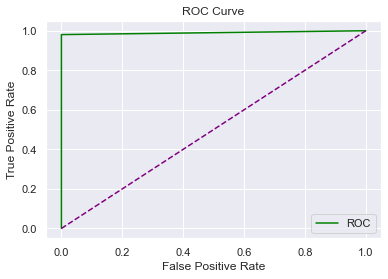

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.24142, n=2, Accuracy: 99.68%


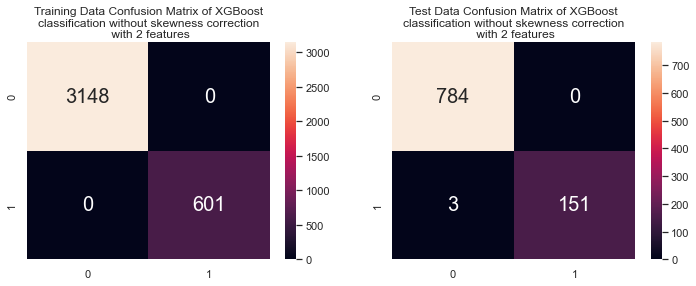

Train Accuracy: 100.00%
Test Accuracy: 99.68%


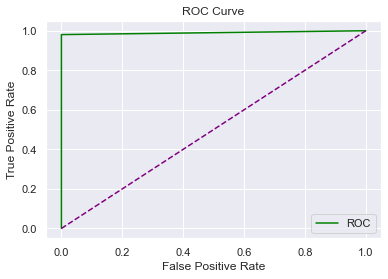

ROC-AUC Score: 0.990
------------------------------------------------------------------------------------------------

 

------------------------------------------------------------------------------------------------
Thresh=0.65799, n=1, Accuracy: 83.26%


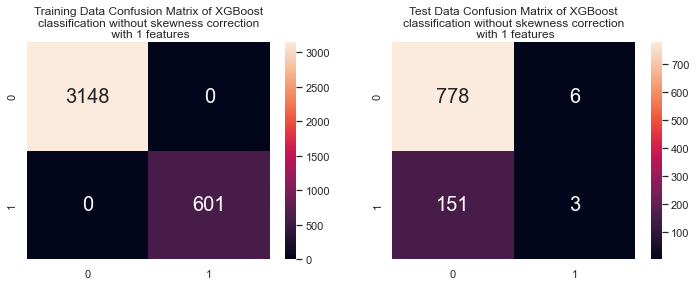

Train Accuracy: 100.00%
Test Accuracy: 83.26%


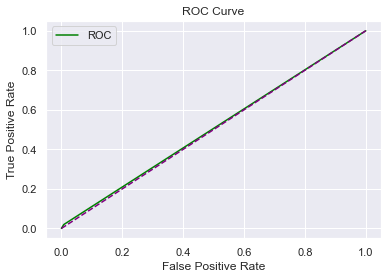

ROC-AUC Score: 0.506
------------------------------------------------------------------------------------------------

 



In [7]:
# choosing threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)

    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("------------------------------------------------------------------------------------------------")
    print("Thresh=%.5f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    y_train_p = model.predict(X_train)
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].set_title('Training Data Confusion Matrix of XGBoost\n' + "classification without skewness correction\n" + f' with {select_X_train.shape[1]} features', wrap=True)
    axes[1].set_title('Test Data Confusion Matrix of XGBoost\n' + "classification without skewness correction\n" + f' with {select_X_train.shape[1]} features', wrap=True)
    sns.heatmap(data=confusion_matrix(y_test, y_pred), annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[1])
    sns.heatmap(data=confusion_matrix(y_train, y_train_p), annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[0])
    #plt.title("Confusion Matrix of XGBoost classification without skewness correction")
    plt.show()

    train_accuracy = accuracy_score(y_train, y_train_p)
    print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
    test_accuracy = accuracy_score(y_test, predictions)
    print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))
    fpr, tpr, thresh = roc_curve(y_test, y_pred)
    plot_roc_curve(fpr, tpr)
    auc_score = roc_auc_score(y_test, y_pred)
    print(f'ROC-AUC Score: {auc_score:.3f}')

    print("------------------------------------------------------------------------------------------------")
    print("\n \n")

<b> We can reduce the number of features used to just the top 2 most important, while preserving accuracy and classifier performance. 

---

---
## b. XGBoost with skewness correction

In [8]:
X = star_data_dropped4[star_data_dropped4.columns.difference(['Hazardous'])]
X.head()

,Absolute Magnitude,Aphelion Dist,Asc Node Longitude,Eccentricity,Est Dia in M(max),Inclination,Jupiter Tisserand Invariant,Mean Anomaly,Mean Motion,Minimum Orbit Intersection,Miss Dist.(kilometers),Orbit Uncertainity,Perihelion Arg,Perihelion Distance,Perihelion Time,Relative Velocity km per sec,Semi Major Axis
0,21.6,2.005764,314.373913,0.425549,284.472297,6.025981,4.634,264.837533,0.590551,0.025282,62753692.0,5,57.257470,0.808259,2.458162e+06,6.115834,1.407011
1,21.3,1.497352,136.717242,0.351674,326.617897,28.412996,5.457,173.741112,0.845330,0.186935,57298148.0,3,313.091975,0.718200,2.457795e+06,18.113985,1.107776
2,20.3,1.966857,259.475979,0.348248,517.654482,4.237961,4.557,292.893654,0.559371,0.043058,7622911.5,0,248.415038,0.950791,2.458120e+06,7.590711,1.458824
3,27.4,1.527904,57.173266,0.216578,19.680675,7.905894,5.093,68.741007,0.700277,0.005512,42683616.0,6,18.707701,0.983902,2.457902e+06,11.173874,1.255903
4,21.6,1.483543,84.629307,0.210448,284.472297,16.793382,5.154,135.142133,0.726395,0.034798,61010824.0,1,158.263596,0.967687,2.457814e+06,9.840831,1.225615


In [9]:
y = star_data_dropped4['Hazardous'].astype(int)
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Hazardous, dtype: int32

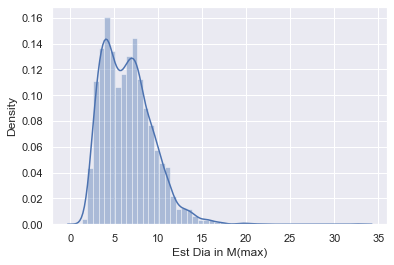

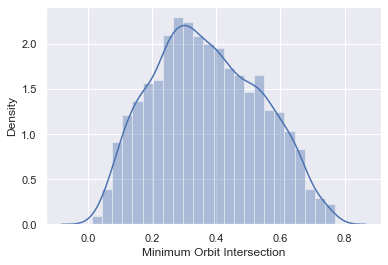

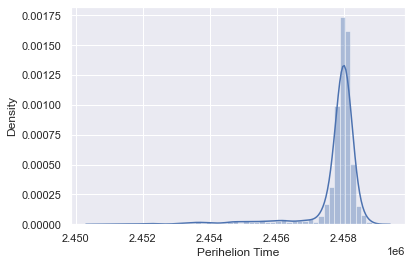

In [10]:
X_train['Est Dia in M(max)'] = np.power((X_train['Est Dia in M(max)']), 1/3)
X_train['Minimum Orbit Intersection'] = np.power((X_train['Minimum Orbit Intersection']), 1/3)
#X_train['Perihelion Time'] = np.power((X_train['Perihelion Time']), 3)

to_plot = X_train['Est Dia in M(max)']
ax = sns.distplot((X_train['Est Dia in M(max)']))
plt.show()
ax = sns.distplot((X_train['Minimum Orbit Intersection']))
plt.show()
ax = sns.distplot((X_train['Perihelion Time']))
plt.show()

<b> Plot of graphs post skewness correction. Perihelion time could not be succesfully corrected.

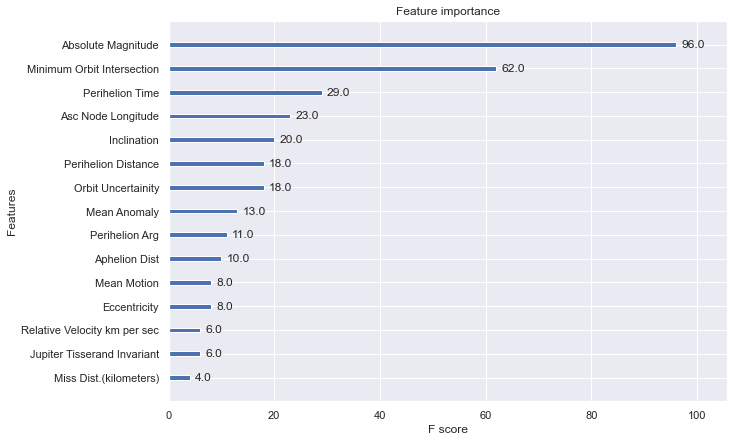

In [11]:
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 7)
plt.show()

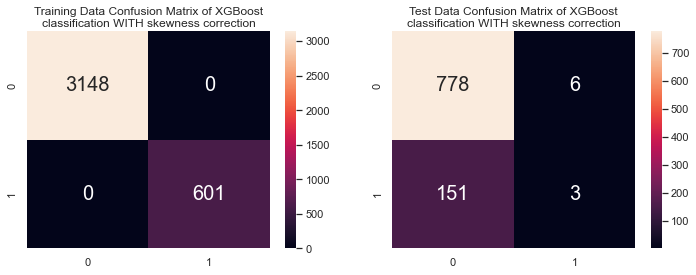

Train Accuracy: 100.00%
Test Accuracy: 83.26%


In [12]:
y_train_p = model.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Training Data Confusion Matrix of XGBoost\n' + "classification WITH skewness correction", wrap=True)
axes[1].set_title('Test Data Confusion Matrix of XGBoost\n' + "classification WITH skewness correction", wrap=True)

sns.heatmap(data=confusion_matrix(y_test, y_pred), annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[1])
sns.heatmap(data=confusion_matrix(y_train, y_train_p), annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[0])
plt.show()

train_accuracy = accuracy_score(y_train, y_train_p)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

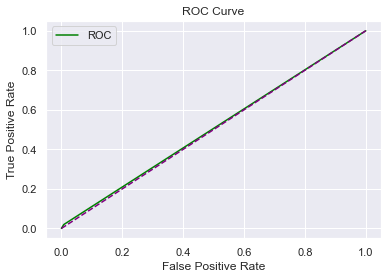

ROC-AUC Score: 0.506


In [13]:
fpr, tpr, thresh = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)
score_rocauc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {score_rocauc:.3f}')

<b> The ROC-AUC is 0.505 which means that the XGBoost model is as good as a model randomly guessing whether an asteroid is hazardous or not. Hence, skewness correction will be omitted.

---
# c) Prediction of uncorrrected data using just 2 variables

In [14]:
X = star_data_dropped4[['Absolute Magnitude', 'Minimum Orbit Intersection']]


y = star_data_dropped4['Hazardous'].astype(int)

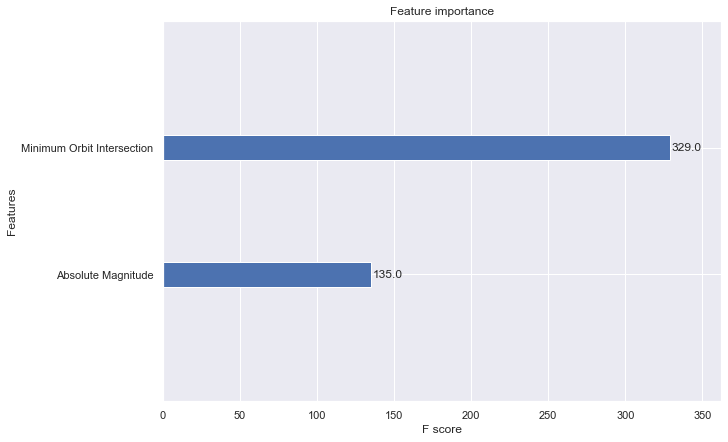

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance

ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 7)
plt.show()

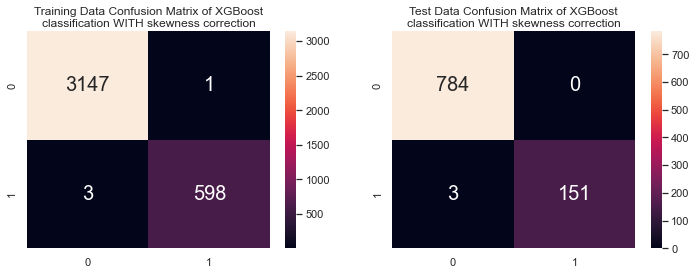

Train Accuracy: 99.89%
Test Accuracy: 99.68%


In [16]:
y_train_p = model.predict(X_train)
y_pred = model.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Training Data Confusion Matrix of XGBoost\n' + "classification WITH skewness correction", wrap=True)
axes[1].set_title('Test Data Confusion Matrix of XGBoost\n' + "classification WITH skewness correction", wrap=True)

sns.heatmap(data=confusion_matrix(y_test, y_pred), annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[1])
sns.heatmap(data=confusion_matrix(y_train, y_train_p), annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[0])
plt.show()

train_accuracy = accuracy_score(y_train, y_train_p)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

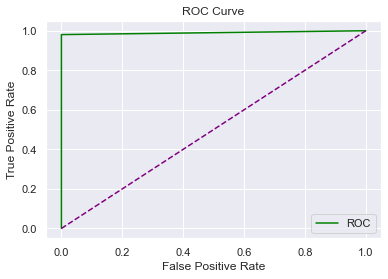

ROC-AUC Score: 0.990


In [17]:
fpr, tpr, thresh = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)
score_rocauc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {score_rocauc:.3f}')

In [18]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
print(results)
print("ROC-AUC: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.99193247 0.99998558 0.99560355 1.         0.9999036  1.
 0.99996142 0.99875679 0.99996132 1.        ]
ROC-AUC: 99.86% (0.26%)
